## Cactvs Table Operations

The Cactvs toolkit supports I/O of a large number of table file formats. All operate on a common chemistry-aware table object class, which provides a lot of data capture and manipulation functionality. This tutorial explains some operations on tables.

One common task is to create a table from one or more structure files, and then write these in a format form human perusal.

Creating a table from an SD file is simple:

In [1]:
mf=Molfile('test.sdf')
# taked a look at the data fields in this file. For the sake of simplicity, we assume
# that all records in the file have the same data. This operation reads a test record,
# auto-generates properties for the data fields, discards the read object and backspaces
# the file. The field properties can be referenced by either
# their proper CACTVS toolkit name, or by the original field name.
mf.peek()
print(mf.fields)

(E_SMILES, E_NAME, E_*PIC50*, E_*MW*, E_*EX_NO*)


As can be seen, this file contains both fields that are mapped to predefined properties (E_SMILES) as well as fields for which a property is synthesized. The original field name can be queried on these:

In [2]:
print(Prop.Get('E_*PIC50*','originalname'))
print(Prop.Ref('E_*MW*').originalname)
p=Prop.Ref('E_*EX_NO*')
print(p.originalname)
print(p.get('originalname'))

pIC50
MW
Ex. No.
Ex. No.


The text of this sample notebook was created in response to a customer request. He wanted to produce a table with editable ChemDraw content which looks like this: 

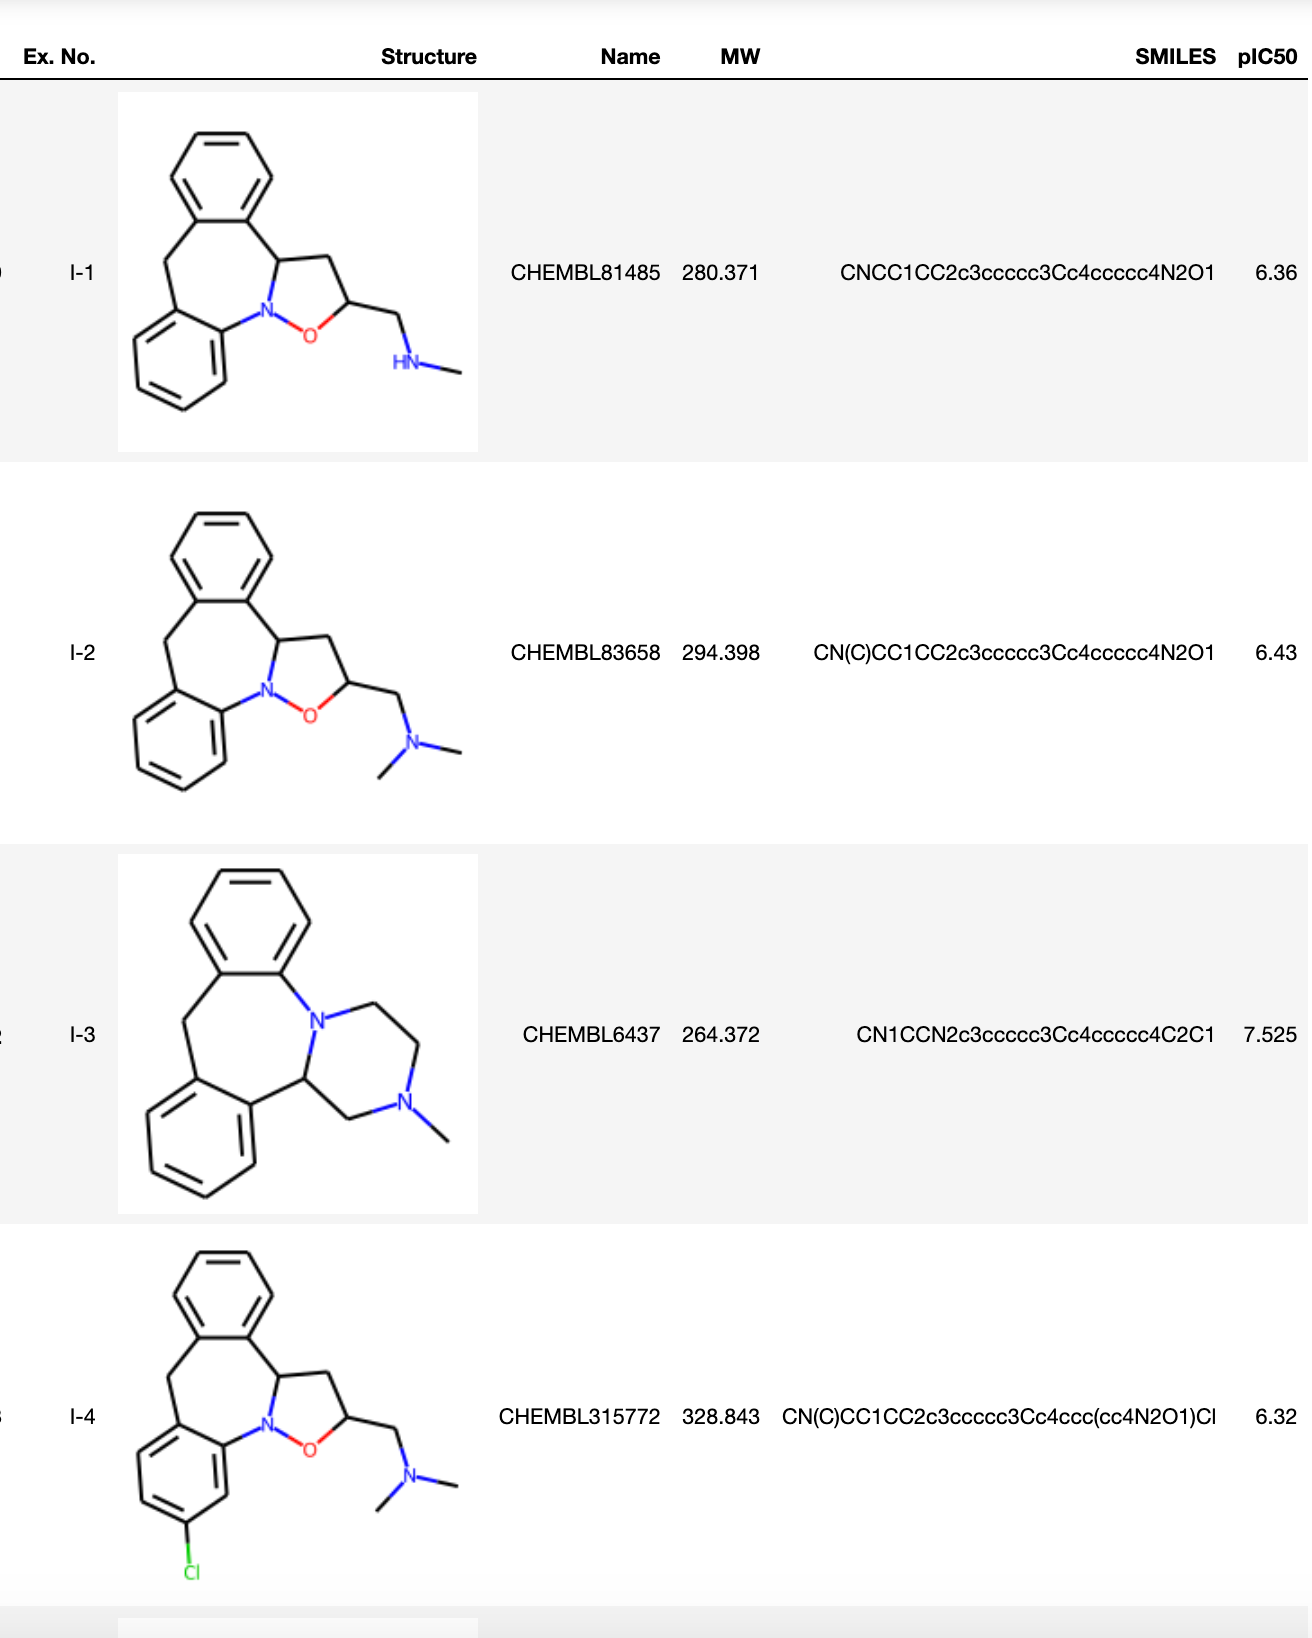

In [3]:
from IPython.display import Image
Image(filename='request.png',height=100,width=500)

Let's begin by defining a suitable table for this. There are various column types in Cactvs table objects, and among these special magic image type. We will use this for the pictures. The other columns are property values, and we can define these directly from our file fields. In this application, these properties are all file data, but they could also be computed properties which are derived from the structure or reaction object associated with a row. The column order is different from what is in the file, though. This is why we define the columns by hand-crafted individual statements:

In [4]:
t=Table()
# a variety of methods to add a column. By property name alias, explicitly indicating this is a property name,
# and with an explicit column name:
t.addcol(('property','Ex. No.'),'Ex. No.')
# Magic column type
t.addcol('image','Structure')
# Via system property
t.addcol('E_NAME','Name')
# Auto-generated property
t.addcol('E_*MW*','MW')
# Property reference
t.addcol(Prop.Ref('E_SMILES'),'Smiles')
# Property reference from alias, with auto-naming from original field name
t.addcol(Prop.Ref('pIC50'))
print(t.colnames)


('Ex. No.', 'Structure', 'Name', 'MW', 'Smiles', 'pIC50')


Filling the table is straightforward. In this tutorial, we read the full file, puts its structure in a dataset object, and use that as data source.The structures remain in memory, and associated with the table rows, which is useful because the image column content is virtual and dependent on the selected output format while writing. However, this consumes memory. A few 10 or 100K structures are no problem for a standard PC, but for larger data sets, a less memory-intensive method to fill the table cells is recommended.

In [5]:
# Create a new dataset, and read the complete file into it
d = mf.read('#new','all')
# yes, we now have a lot of structures, corresponding to the file records
print(d.ens()[:10])

[ens0, ens1, ens2, ens3, ens4, ens5, ens6, ens7, ens8, ens9]


Now, add the dataset to the table. The number of rows added corresponds to the object count of the dataset, and all column values are either extracted, or, if not yet present, computed on the dataset objects.

In [6]:
t.adddataset(d)

166

Let's see if the table is filled.

In [7]:
# Note that the image cells do not currently contain image data, just a structure reference
print(t.rowget1(0))
print(t.rowget1('end'))

('I-1', ens0, 'CHEMBL81485', '280.371', 'CNCC1CC2c3ccccc3Cc4ccccc4N2O1', '6.36')
('I-166', ens165, 'CHEMBL513389', '277.408', 'Cc1ccc(c2c1CCC2)OCC(C(C)NC(C)C)O', '9.3')


Now, let's see if we can write this as a ChemDraw table. We set a few parameters for the image format first.

In [9]:
t.colset('Structure','imgparameters','frame 0 width 120 height 120')
t.write('test.cdxml')
t.write('test.tbin')

table4

Another useful format: Excel .xlsx table with embedded ChedmDraw OLE objects:

In [10]:
t.embedfileformat = 'cdx'
t.write('test.xlsx')

table4

In [ ]:
Molfile.Close('all')
Table.Delete('all')
Dataset.Delete('all')